In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocessing
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
np.random.seed(42)

In [4]:
# Create model
model = Sequential()
model.add(Dense(4096, activation='relu', input_shape=(784,),kernel_regularizer=regularizers.l2(0.00001), name='hidden_1'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_2'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_3'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_4'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax', name='output'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 4096)              3215360   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
hidden_2 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_4 (Dense)             (None, 512)               5

In [6]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    batch_size=4096,
                    epochs=36,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/36
15/15 [==============================] - 2s 161ms/step - loss: 1.5035 - accuracy: 0.5072 - val_loss: 0.7584 - val_accuracy: 0.7425
Epoch 2/36
15/15 [==============================] - 2s 154ms/step - loss: 0.6664 - accuracy: 0.7713 - val_loss: 0.5695 - val_accuracy: 0.8166
Epoch 3/36
15/15 [==============================] - 2s 153ms/step - loss: 0.5303 - accuracy: 0.8310 - val_loss: 0.4954 - val_accuracy: 0.8416
Epoch 4/36
15/15 [==============================] - 2s 155ms/step - loss: 0.4624 - accuracy: 0.8559 - val_loss: 0.4617 - val_accuracy: 0.8526
Epoch 5/36
15/15 [==============================] - 2s 152ms/step - loss: 0.4223 - accuracy: 0.8681 - val_loss: 0.4392 - val_accuracy: 0.8654
Epoch 6/36
15/15 [==============================] - 2s 153ms/step - loss: 0.4069 - accuracy: 0.8712 - val_loss: 0.4338 - val_accuracy: 0.8633
Epoch 7/36
15/15 [==============================] - 2s 154ms/step - loss: 0.3792 - accuracy: 0.8821 - val_loss: 0.4131 - val_accuracy: 0.8749
Epoch 

In [7]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9010999798774719


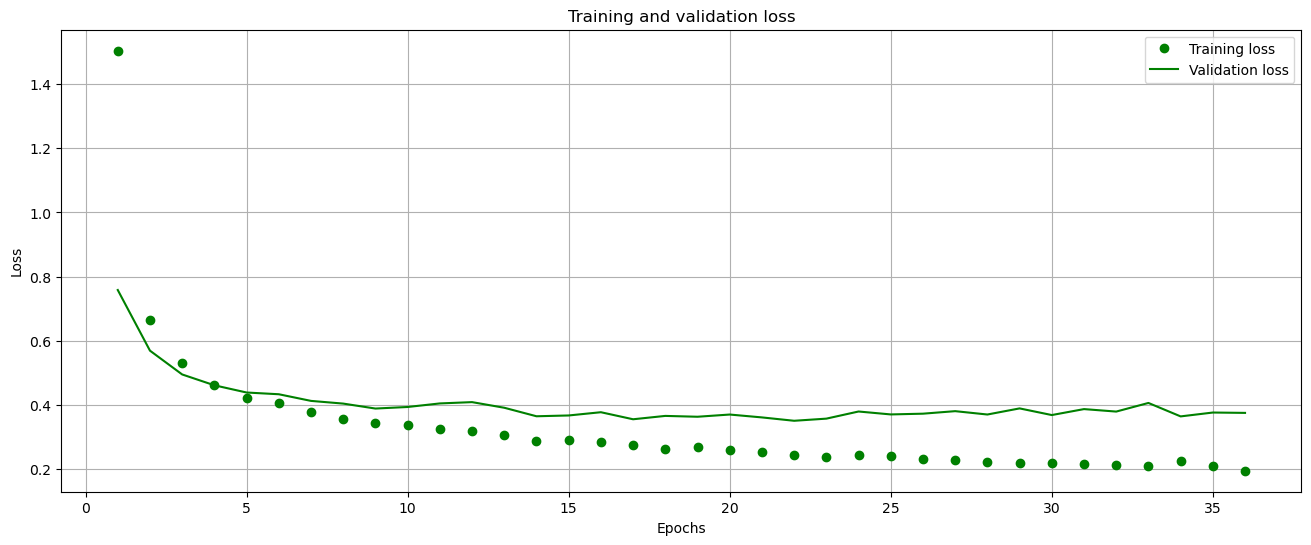

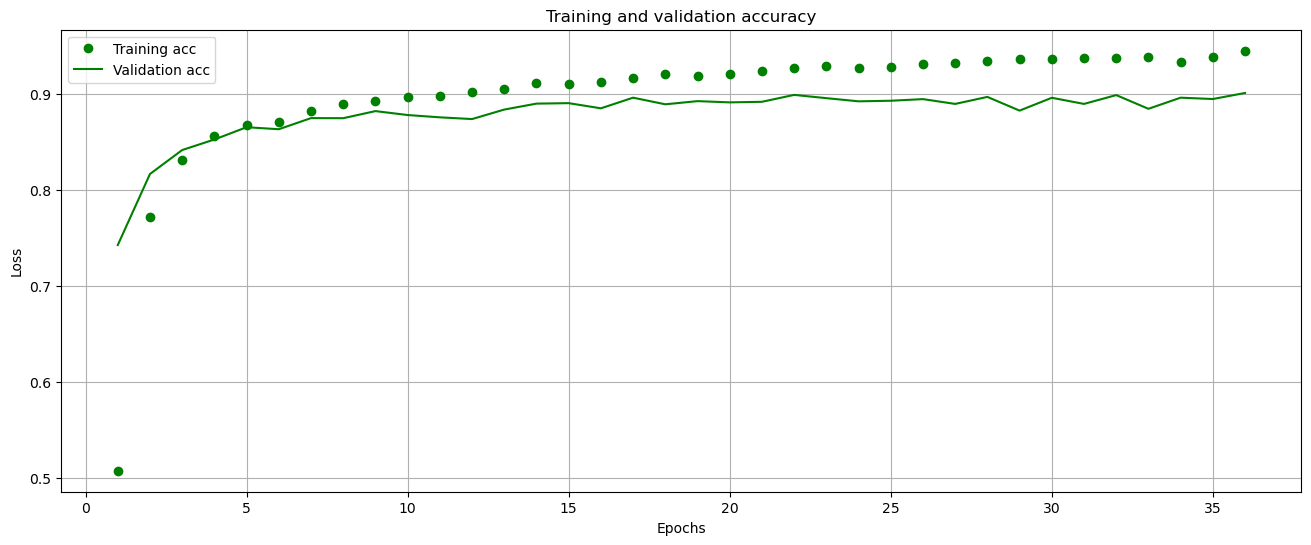

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()